In [16]:
import pandas as pd 
pima = pd.read_csv('diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
pima.shape

(768, 9)

In [20]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose','DiabetesPedigreeFunction']
x = pima[feature_cols]
y = pima.Outcome 

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x1, y, test_size=0.25, random_state=0)
print('whole data size:', pima.shape)
print('training data size:', x_train.shape)
print('testing data size:', x_test.shape)

whole data size: (768, 9)
training data size: (576, 6)
testing data size: (192, 6)


In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [24]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
camparisan_df = pd.DataFrame({'actual diabetic diagnoses': y_test, 'predicted': y_pred})
camparisan_df.to_csv('diabetes_prediction_comparison.csv',index=True)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
camparisan_df.head(10)

,actual diabetic diagnoses,predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
103,0,0
338,1,1
588,1,1
395,0,0
204,0,0


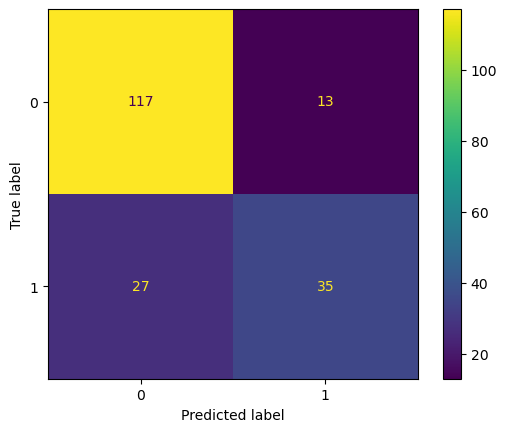

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred,labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('The Logistic Regression Model Accuracy:',accuracy)

The Logistic Regression Model Accuracy: 0.7916666666666666


In [28]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       130
           1       0.73      0.56      0.64        62

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.75       192
weighted avg       0.79      0.79      0.78       192



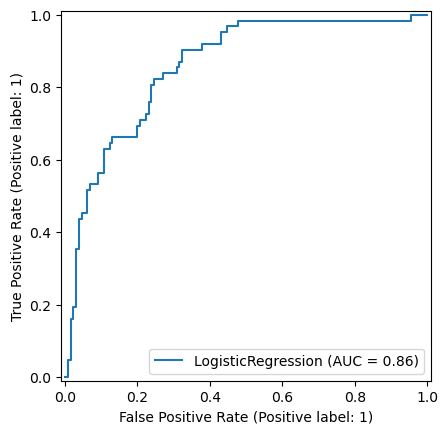

In [29]:
from sklearn.metrics import RocCurveDisplay
logreg_roc = RocCurveDisplay.from_estimator(logreg, x_test, y_test)